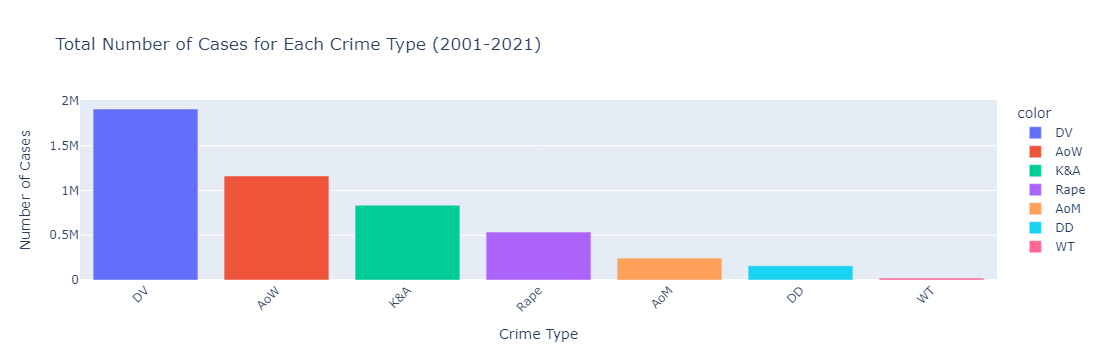

The most common crime is: DV with 1909978 cases


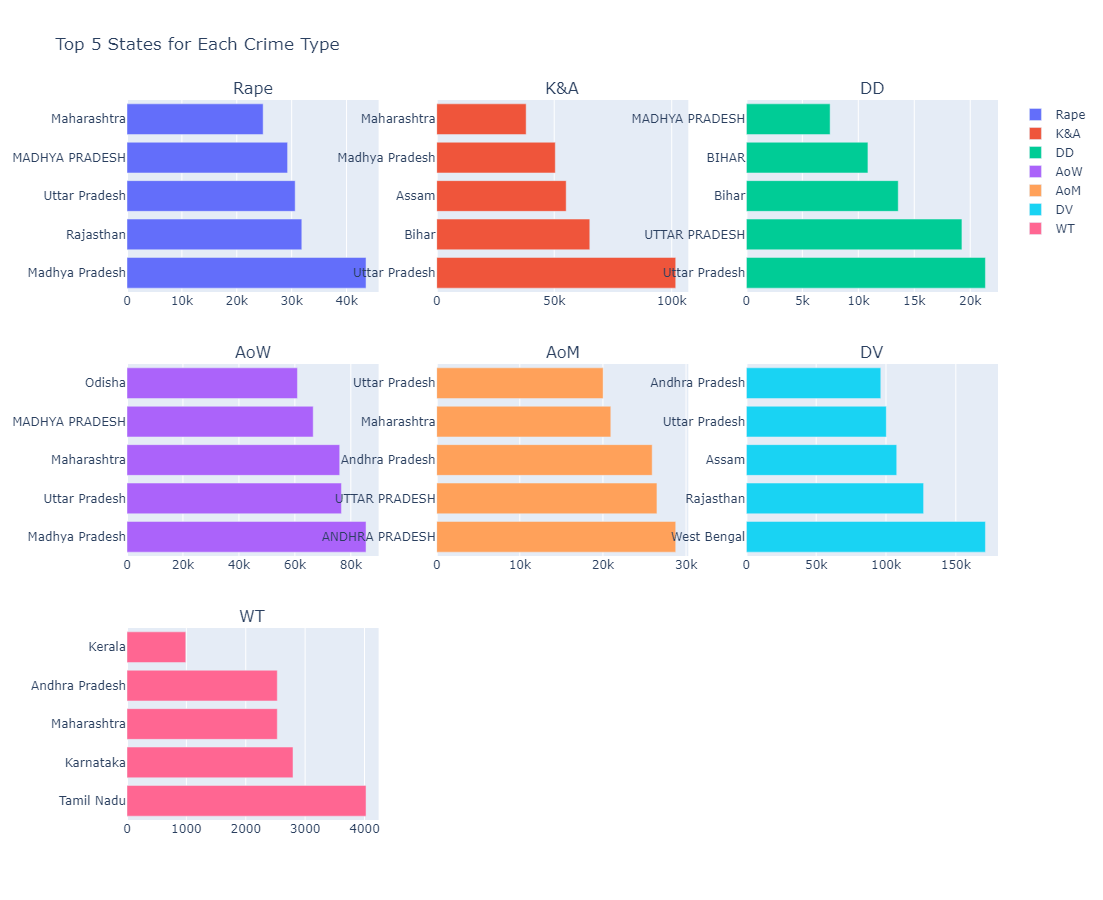

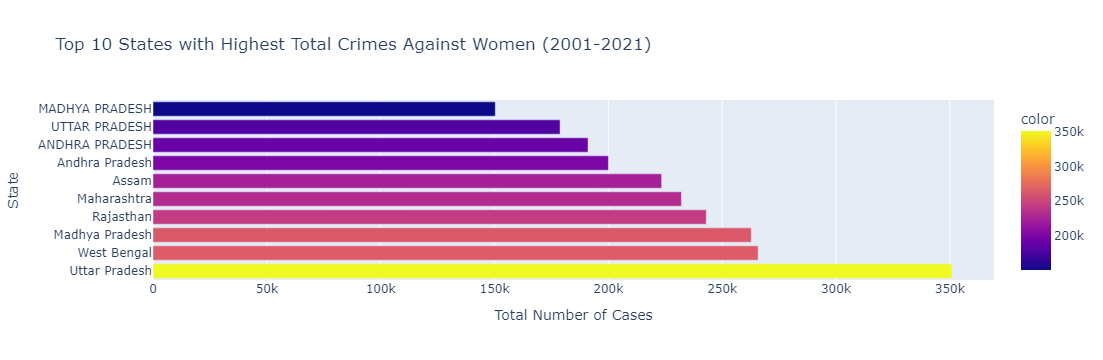

The state with the most crimes overall is: Uttar Pradesh with 350934 cases


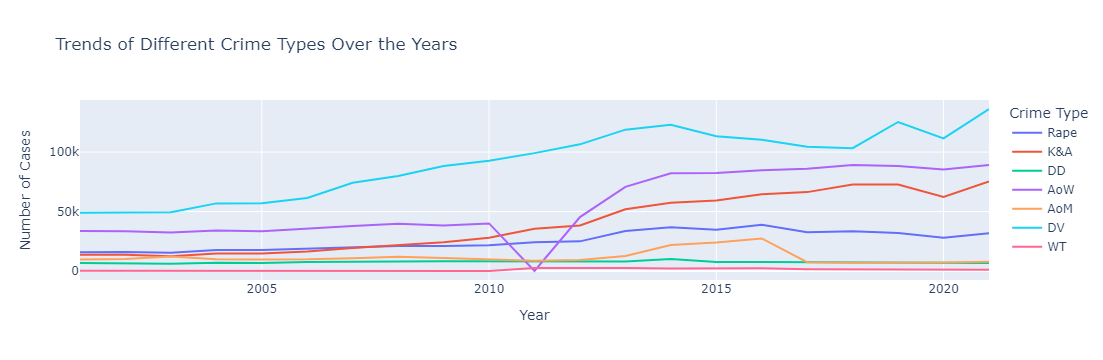

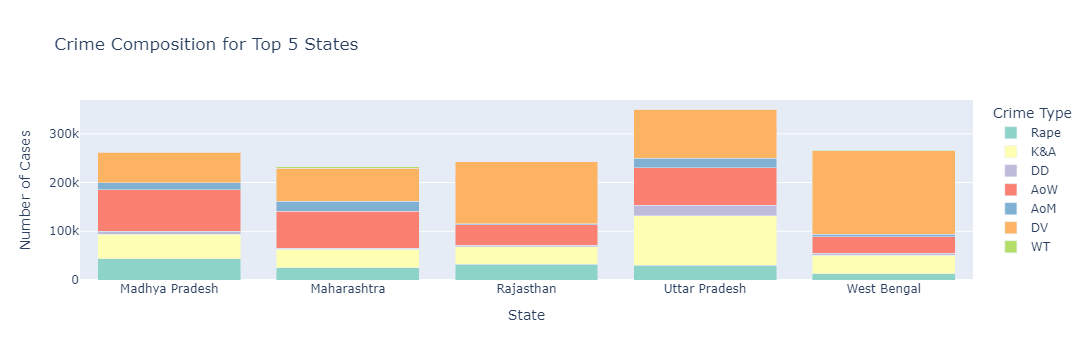

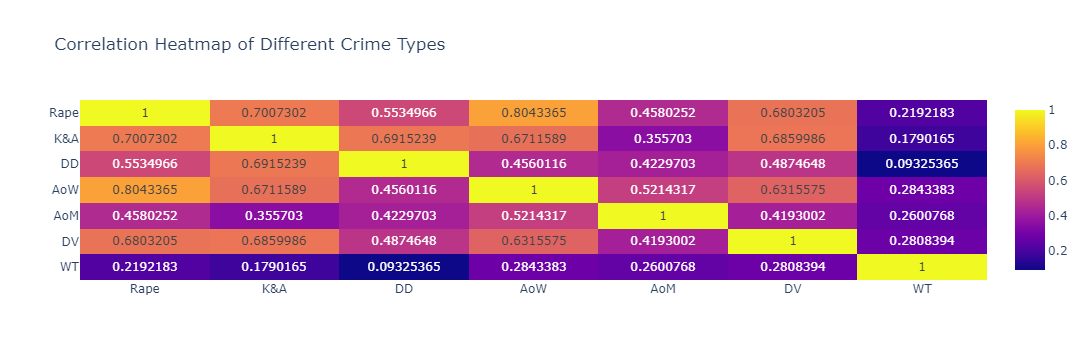

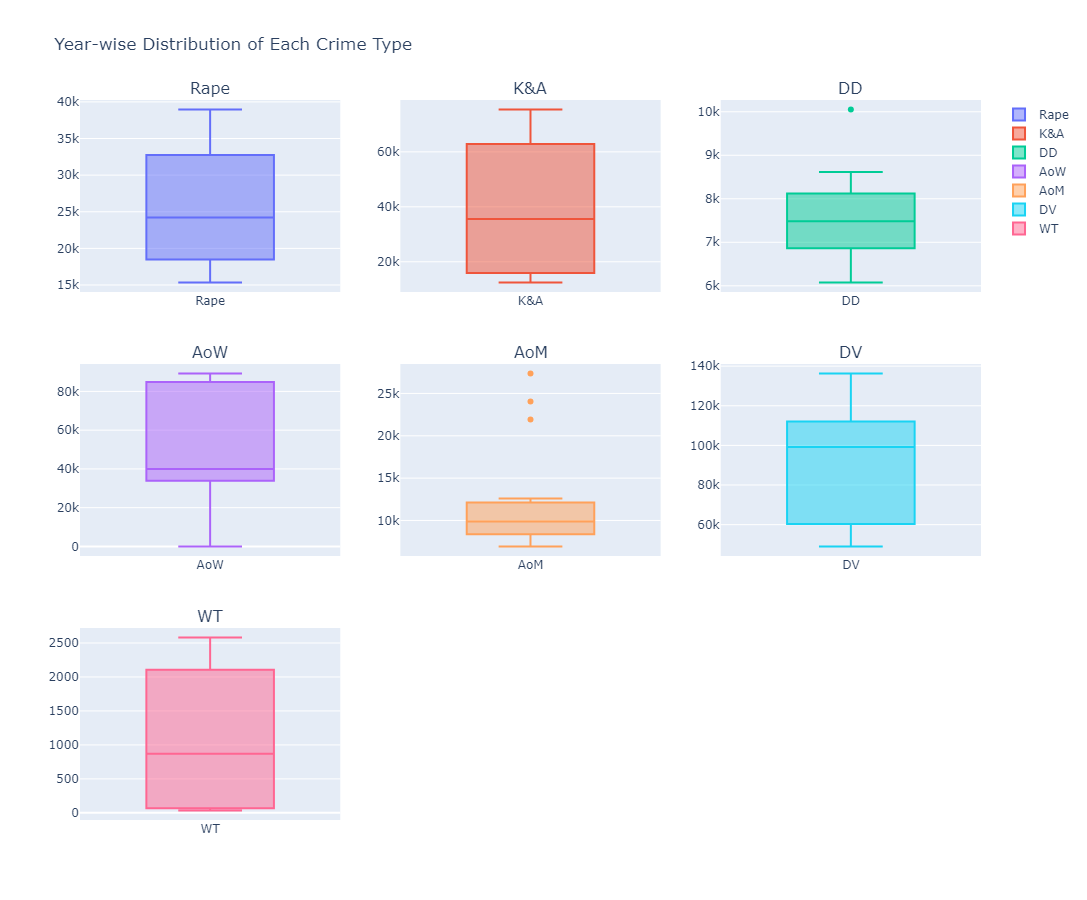

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv('CrimesOnWomenData.csv')

# 1. Most common crime (using Plotly for interactivity)
def visualize_most_common_crime():
    crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    crime_totals = df[crime_columns].sum().sort_values(ascending=False)
    
    fig = px.bar(x=crime_totals.index, y=crime_totals.values,
                 title='Total Number of Cases for Each Crime Type (2001-2021)',
                 labels={'x': 'Crime Type', 'y': 'Number of Cases'},
                 color=crime_totals.index)
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    
    print(f"The most common crime is: {crime_totals.index[0]} with {crime_totals.values[0]} cases")

# 2. States leading in each crime (using Plotly subplots)
def visualize_top_states_per_crime():
    crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    
    fig = make_subplots(rows=3, cols=3, subplot_titles=crime_columns, vertical_spacing=0.1)
    
    for i, crime in enumerate(crime_columns):
        state_totals = df.groupby('State')[crime].sum().sort_values(ascending=False).head(5)
        
        fig.add_trace(
            go.Bar(x=state_totals.values, y=state_totals.index, orientation='h', name=crime),
            row=i//3 + 1, col=i%3 + 1
        )
    
    fig.update_layout(height=900, width=1200, title_text="Top 5 States for Each Crime Type")
    fig.show()

# 3. State with most number of all crimes (using Plotly)
def visualize_top_states_overall():
    crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    state_totals = df.groupby('State')[crime_columns].sum().sum(axis=1).sort_values(ascending=False).head(10)
    
    fig = px.bar(x=state_totals.values, y=state_totals.index, orientation='h',
                 title='Top 10 States with Highest Total Crimes Against Women (2001-2021)',
                 labels={'x': 'Total Number of Cases', 'y': 'State'},
                 color=state_totals.values)
    fig.show()
    
    print(f"The state with the most crimes overall is: {state_totals.index[0]} with {state_totals.values[0]} cases")

# 4. Crime trends over the years
def visualize_crime_trends():
    crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    yearly_data = df.groupby('Year')[crime_columns].sum()
    
    fig = px.line(yearly_data, x=yearly_data.index, y=crime_columns,
                  title='Trends of Different Crime Types Over the Years',
                  labels={'value': 'Number of Cases', 'variable': 'Crime Type'})
    fig.show()

# 5. Crime composition for top 5 states
def visualize_crime_composition():
    crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    state_totals = df.groupby('State')[crime_columns].sum().sum(axis=1).sort_values(ascending=False).head(5)
    top_5_states = state_totals.index
    
    data = df[df['State'].isin(top_5_states)].groupby('State')[crime_columns].sum()
    
    fig = px.bar(data, x=data.index, y=crime_columns,
                 title='Crime Composition for Top 5 States',
                 labels={'value': 'Number of Cases', 'variable': 'Crime Type'},
                 color_discrete_sequence=px.colors.qualitative.Set3)
    fig.update_layout(barmode='stack')
    fig.show()

# 6. Heatmap of crime correlation
def visualize_crime_correlation():
    crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    corr = df[crime_columns].corr()
    
    fig = px.imshow(corr, text_auto=True, aspect="auto",
                    title="Correlation Heatmap of Different Crime Types")
    fig.show()

# 7. Year-wise distribution of each crime type
def visualize_yearly_distribution():
    crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    
    fig = make_subplots(rows=3, cols=3, subplot_titles=crime_columns, vertical_spacing=0.1)
    
    for i, crime in enumerate(crime_columns):
        yearly_data = df.groupby('Year')[crime].sum()
        
        fig.add_trace(
            go.Box(y=yearly_data.values, name=crime),
            row=i//3 + 1, col=i%3 + 1
        )
    
    fig.update_layout(height=900, width=1200, title_text="Year-wise Distribution of Each Crime Type")
    fig.show()

# Run all visualizations
visualize_most_common_crime()
visualize_top_states_per_crime()
visualize_top_states_overall()
visualize_crime_trends()
visualize_crime_composition()
visualize_crime_correlation()
visualize_yearly_distribution()